# Phase 3 Project Description

#### This project will use the SyriaTel Customer Churn dataset to explore customer behavior and develop a foundational understanding of the factors that influence customer churn, serving as a basis for building and evaluating machine learning models. 


## Project Overview

#### For this project, I will use exploratory data analysis to prepare and clean the dataset in preparation for building a machine learning model that will predict customer churn rate and generate other useful insights for the stakeholder.

### Business Problem

Syria Telecommunications Company is aiming to cutdown its running costs, reducing the money it loses because of the customers who don't stick around very long. Based on their usage and customer behaviour, I aim to build a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel.

### Deliverables


#### The deliverables of this project include:

1. Identify the key drivers behind customer churn.

2. Develop a predictive model to flag customers with a high probability of churning.

3. Provide actionable recommendations to reduce churn based on model insights.

In [243]:
# importing all the necessary libraries i will be needing to deliver on this project

# pandas and numpy are for data exploration and analysis
import pandas as pd
import numpy as np

# matplotlib & seaborn are for visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# Train_test split to split my training and test data for my model
from sklearn.model_selection import train_test_split

# LogisticRegression is the supervised model i will be using to predict customer churn rate 
from sklearn.linear_model import LogisticRegression
 
# For evaluation of my model
from sklearn.metrics import accuracy_score,confusion_matrix


In [244]:
# Loading and viewing the dataset we are working with
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [245]:
# Getting a better understanding of the columns we are working with, if they have missing values and what are their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Seeing as we have a dataframe with 21 columns and 3334 rows, none being empty, we can proceed to label encode the categorical columns.

In [246]:
# Seeing as our model(or rather most models) require us to use numerical data, we need to convert the categorical columns to numerical so we can work with them.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    df[col] = encoder.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   state                   3333 non-null   int32
 1   account length          3333 non-null   int64
 2   area code               3333 non-null   int64
 3   phone number            3333 non-null   int32
 4   international plan      3333 non-null   int32
 5   voice mail plan         3333 non-null   int32
 6   number vmail messages   3333 non-null   int64
 7   total day minutes       3333 non-null   int64
 8   total day calls         3333 non-null   int64
 9   total day charge        3333 non-null   int64
 10  total eve minutes       3333 non-null   int64
 11  total eve calls         3333 non-null   int64
 12  total eve charge        3333 non-null   int64
 13  total night minutes     3333 non-null   int64
 14  total night calls       3333 non-null   int64
 15  total night charge   

In [247]:
# checking to see that the categorical columns have been converted.
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,126,1,1926,0,1,19,1491,70,1491,...,60,684,1184,49,657,79,3,79,1,0
1,35,105,1,1575,0,1,20,667,83,667,...,64,668,1265,61,701,116,3,116,1,0
2,31,135,1,1117,0,0,0,1362,74,1362,...,71,150,443,62,292,101,5,101,0,0
3,35,82,0,1707,1,0,0,1625,31,1625,...,49,13,758,47,445,45,7,45,2,0
4,36,73,1,110,1,0,0,711,73,711,...,83,307,664,79,401,80,3,80,3,0


In [248]:
#Checking to see if there are any rows that are duplicated within our dataframe seeing as this skew our model
df.duplicated().sum()

0

### Visualizing the data

#### Let's preliminary explore the data to see what insights we can visualize

Let's see how our data is distuributed when it comes to churn

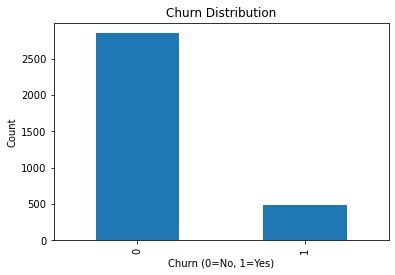

In [249]:
df['churn'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

##### From the graph above, we can see that our dataset has a lot more false churn as compared to the true churn.

From the data, let's see which factors contribute highly to churn rate

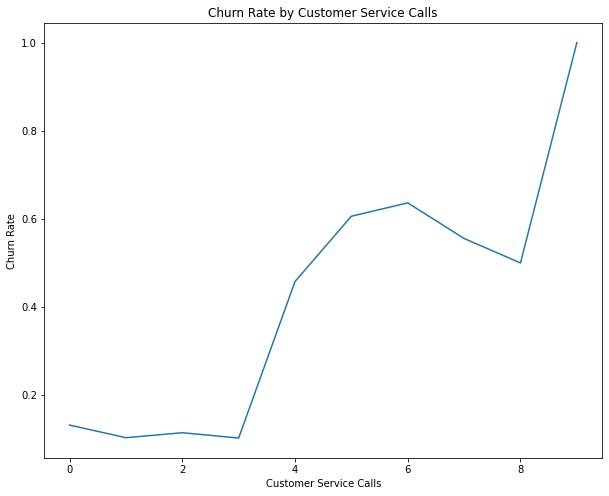

In [250]:
# Looking at the rate of customer service calls and how it affects churn

grouped = df.groupby('customer service calls')['churn'].mean()

plt.figure(figsize=(10,8))
plt.plot(grouped.index, grouped.values)
plt.xlabel("Customer Service Calls")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Customer Service Calls")
plt.show()

##### We can see that majority of the customers that called the service centre more than 2 times resulted to defaulting from their subscription. This is likely due to unresolved issues. Syria Telecommunications should aim to ensure that customer issues are resolved within the 1st call and if the issues persist, recommend alternatives to their customers.

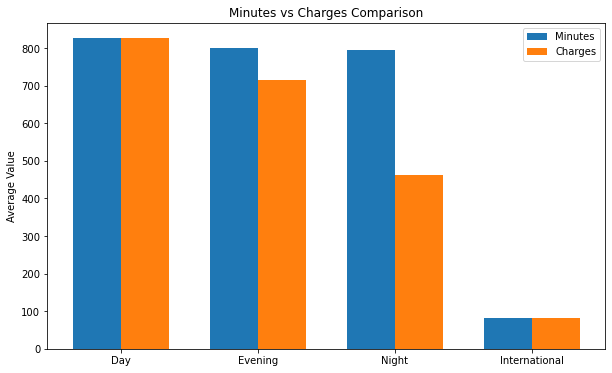

In [251]:
# Looking at how 
# Average minutes
avg_minutes = [
    df['total day minutes'].mean(),
    df['total eve minutes'].mean(),
    df['total night minutes'].mean(),
    df['total intl minutes'].mean()
]

# Average charges
avg_charges = [
    df['total day charge'].mean(),
    df['total eve charge'].mean(),
    df['total night charge'].mean(),
    df['total intl charge'].mean()
]
avg_day_calls = df['total day calls'].mean()
avg_eve_calls = df['total eve calls'].mean()

avg_day_minutes = df['total day minutes'].mean()
avg_eve_minutes = df['total eve minutes'].mean()

calls = [avg_day_calls, avg_eve_calls]
minutes = [avg_day_minutes, avg_eve_minutes]
labels = ['Day', 'Evening', 'Night', 'International']
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width/2, avg_minutes, width, label='Minutes')
bars2 = plt.bar(x + width/2, avg_charges, width, label='Charges')

plt.xticks(x, labels)
plt.title("Minutes vs Charges Comparison")
plt.ylabel("Average Value")
plt.legend()

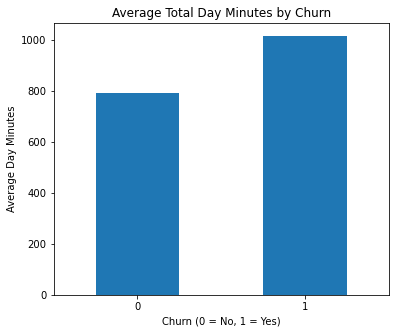

In [252]:
# Visualizing the customer behaviour, that is, are customers who use a lot of day minutes churning?
# Seeing as day minutes usually cost more,this would be a huge indicator that maybe the rates are not favourable.
avg_usage = df.groupby('churn')['total day minutes'].mean()

plt.figure(figsize=(6, 5))
avg_usage.plot(kind='bar')

plt.title('Average Total Day Minutes by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Day Minutes')
plt.xticks(rotation=0)
plt.show()

In [254]:
# checking to see which columns are directly correlated with our target variable 'Churn'.
df.corr()['churn'].round(4)

state                     0.0078
account length            0.0163
area code                 0.0033
phone number              0.0056
international plan        0.2599
voice mail plan          -0.1021
number vmail messages    -0.0856
total day minutes         0.1876
total day calls           0.0198
total day charge          0.1876
total eve minutes         0.0903
total eve calls           0.0085
total eve charge          0.0904
total night minutes       0.0361
total night calls         0.0061
total night charge        0.0366
total intl minutes        0.0670
total intl calls         -0.0528
total intl charge         0.0670
customer service calls    0.2087
churn                     1.0000
Name: churn, dtype: float64

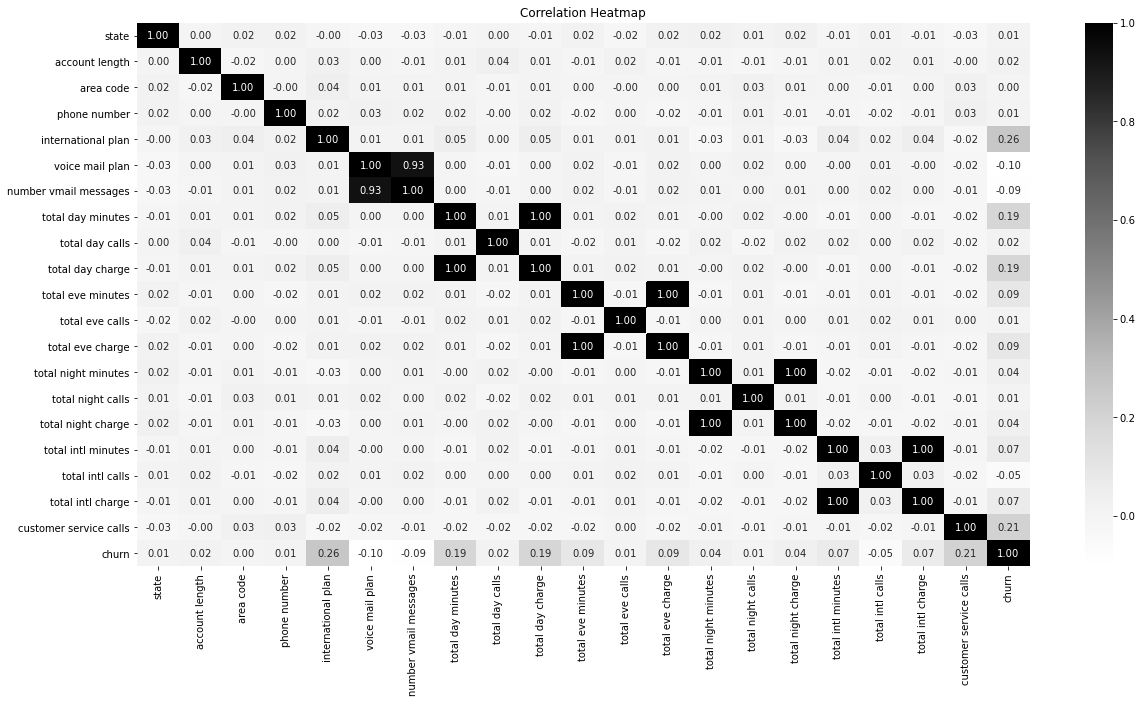

In [255]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='Greys', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [256]:
# Using describe to see if our data is on the same scale, that is, will we need to scale some of these columns to standardize them.
df.describe()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,26.059406,99.005101,1.000600,1666.00000,0.096910,0.276628,6.440144,826.339634,60.467447,826.339634,...,61.132613,715.447645,793.796580,58.109511,463.044404,81.478548,4.479448,81.478548,1.562856,0.144914
std,14.824911,39.589501,0.709649,962.29855,0.295879,0.447398,11.146322,417.413913,19.893502,417.413913,...,19.806578,352.373293,399.771092,19.515154,209.589781,27.420275,2.461214,27.420275,1.315491,0.352067
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,72.000000,0.000000,833.00000,0.000000,0.000000,0.000000,508.000000,47.000000,508.000000,...,48.000000,447.000000,484.000000,45.000000,312.000000,64.000000,3.000000,64.000000,1.000000,0.000000
50%,26.000000,99.000000,1.000000,1666.00000,0.000000,0.000000,0.000000,820.000000,61.000000,820.000000,...,61.000000,717.000000,795.000000,58.000000,462.000000,82.000000,4.000000,82.000000,1.000000,0.000000
75%,39.000000,125.000000,2.000000,2499.00000,0.000000,1.000000,14.000000,1146.000000,74.000000,1146.000000,...,75.000000,982.000000,1103.000000,71.000000,616.000000,100.000000,6.000000,100.000000,2.000000,0.000000
max,50.000000,211.000000,2.000000,3332.00000,1.000000,1.000000,45.000000,1666.000000,118.000000,1666.000000,...,122.000000,1439.000000,1590.000000,119.000000,932.000000,161.000000,20.000000,161.000000,9.000000,1.000000


In [257]:
# seeing as the data is not on the same scale with some columns being in minutes, currency and count, we need to scale the data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_scale = ['state', 'account length', 'international plan', 'voice mail plan', 'number vmail messages',
                 'total day minutes', 'total day calls', 'total day charge',
                 'total eve minutes', 'total eve calls', 'total eve charge',
                 'total night minutes', 'total night calls', 'total night charge',
                 'total intl minutes', 'total intl calls', 'total intl charge',
                 'customer service calls']

X = df[columns_scale]
y = df['churn'] 

df[columns_scale] = scaler.fit_transform(X)

df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,-0.678649,0.681972,1,1926,-0.327580,1.617086,1.126985,1.592568,0.479251,1.592568,...,-0.057192,-0.089259,0.976214,-0.466862,0.925545,-0.090405,-0.601195,-0.090405,-0.427932,0
1,0.603170,0.151449,1,1575,-0.327580,1.617086,1.216714,-0.381788,1.132829,-0.381788,...,0.144791,-0.134672,1.178860,0.148137,1.135510,1.259164,-0.601195,1.259164,-0.427932,0
2,0.333313,0.909340,1,1117,-0.327580,-0.618396,-0.577869,1.283476,0.680352,1.283476,...,0.498262,-1.604924,-0.877625,0.199387,-0.816214,0.712042,0.211534,0.712042,-1.188218,0
3,0.603170,-0.429600,0,1707,3.052685,-0.618396,-0.577869,1.913641,-1.481482,1.913641,...,-0.612647,-1.993775,-0.089556,-0.569362,-0.086107,-1.330549,1.024263,-1.330549,0.332354,0
4,0.670634,-0.656967,1,110,3.052685,-0.618396,-0.577869,-0.276361,0.630077,-0.276361,...,1.104212,-1.159307,-0.324726,1.070636,-0.296072,-0.053930,-0.601195,-0.053930,1.092641,0


In [258]:
#After scaling, let's have the X & y in one new dataframe moving forward.

import pandas as pd

new_df = pd.concat([X, y], axis=1)
new_df.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,126,0,1,19,1491,70,1491,767,60,684,1184,49,657,79,3,79,1,0
1,35,105,0,1,20,667,83,667,748,64,668,1265,61,701,116,3,116,1,0
2,31,135,0,0,0,1362,74,1362,158,71,150,443,62,292,101,5,101,0,0
3,35,82,1,0,0,1625,31,1625,13,49,13,758,47,445,45,7,45,2,0
4,36,73,1,0,0,711,73,711,330,83,307,664,79,401,80,3,80,3,0


### Modelling & Evaluation

#### Logistic Regression

In [259]:
# Now let's set our X variables (those with high correlation to churn rate) so we are able to split our train and test data.
selected_variables =['account length', 'international plan','total day minutes', 'total day charge',
                 'total eve minutes', 'total eve charge',
                 'total night minutes', 'total night charge',
                 'total intl minutes', 'total intl charge',
                 'customer service calls']
X1 = new_df[selected_variables]
y1 = new_df['churn']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.5,random_state=452)


In [260]:
# before instantiating and fitting our model,we need to understand if it is skewed(imbalanced) as this will have an effect on the model outcomes.
new_df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

Seeing as there is a big imbalance in the target class, we need to introduced class_weight=balanced to automatically adjust the weight of each class(0 and 1).Here, the undervalued class, that is 'true' or '1' gets more attention from the model than the class 'false'.Meaning that mis-predictions on the true class are penalized more heavily.

In [261]:
#instantiating and fitting our model

LogR = LogisticRegression(max_iter=1000,class_weight='balanced')
LogR.fit(X1_train,y1_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [268]:
# Predicting our y1 values using the fitted model

y_pred = LogR.predict(X1_test)

##### Accuracy score

In [263]:
churn_accuracy = accuracy_score(y1_test,y_pred)

print(f'Accurancy score of the model fitted:{churn_accuracy:.3f} ({churn_accuracy*100:.1f}%)')

Accurancy score of the model fitted:0.751 (75.1%)


In [264]:
# From the information gathered earlier, i believe that some of the independent variables that exhibit multicollinearity. 
# To resolve this, we use ridge regularization that introduces a penalty to shrink coefficients towards 0 handling multicollinearity.

from sklearn.linear_model import Ridge

rdg = Ridge(alpha=1.0)

rdg.fit(X1_train, y1_train)

y_pred = rdg.predict(X1_test)

In [265]:
LogR.coef_

array([[ 1.08770776e-03,  2.12102429e+00,  7.53054989e-04,
         7.53054989e-04,  6.27272724e-03, -6.35187059e-03,
         4.49853874e-03, -7.45537092e-03,  2.18318280e-03,
         2.18318280e-03,  6.06805630e-01]])

In [266]:
rdg.coef_

array([ 5.88485410e-05,  2.82653450e-01,  6.86673791e-05,  6.86673803e-05,
        1.30629395e-03, -1.41738313e-03,  4.13692188e-04, -6.74810873e-04,
        3.52475771e-04,  3.52475771e-04,  6.47450040e-02])

we see that the coefficients have reduced.

#### Confusion Matrix

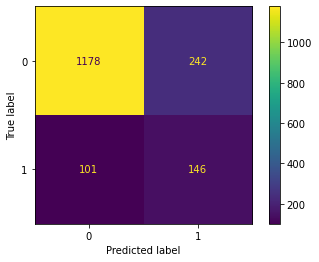

In [ ]:
#Evaluation of the logistic model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y1_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

Seeing as the data is not balanced, we cannot use the accuracy score metric alone to evaluate the data. Let's visualize the classification report to get a better understanding of our model.

In [270]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y1_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1420
           1       0.34      0.72      0.46       247

    accuracy                           0.75      1667
   macro avg       0.64      0.74      0.65      1667
weighted avg       0.85      0.75      0.78      1667



### Interpretation of the model - Logistic Regression

The classification report tells us how well our model is performing when predicting those customers who'll churn and those who'll stay with Syria Telecommunications.

From the support column, we can see that the predicted y values for class false is 1420 while those values predicted as true are a total of 247. We can already see that there is a big imbalance in our dataset with false values being greater than the true ones.

Hence, this logistic model seems to perform well when predicting those customers that will not default with it being 94% correct of the time. On contrast, the model seems to perform quite poorly when predicting cutomers that will churn, being 34% correct of the time.

Recall here shows how accurately our model predicted the y values. Out of the total predictions for customers who will not churn, we see that our model got 76% of the predictions right and predicted correctly 72% of the customers that did churn. So in spite of our precision for predicting true values being quite low at 34%, we see that the logistic model is fairly good.

On average, we see that this model is 75% accurate at predicting churn. However, the model seems to be biased towards the false values because of our imbalanced dataset.



#### Improving the Logistic Regression model

To improve the logistic model, let's improve the decision threshold. Usually, logistic regression model predicts 1 if the probability is >=0.5 and 0 when probability is <0.5.

In [ ]:
# to improve precision for class 1, let's experiment with different thresholds.
thresholds = np.arange(0.1, 0.9, 0.05) #various thresholds to test,0.05 being the interval of increase with 0.1 as min and 0.9 as max
y_prob = LogR.predict_proba(X1_test)[:,1] # the probabilities of 'true' class
for t in thresholds:
    y_pred_t = (y_prob >= t)
    print(f"Threshold: {t}")
    print(classification_report(y1_test, y_pred_t))

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.99      0.07      0.12      1420
           1       0.16      1.00      0.27       247

    accuracy                           0.20      1667
   macro avg       0.57      0.53      0.20      1667
weighted avg       0.87      0.20      0.15      1667

Threshold: 0.15000000000000002
              precision    recall  f1-score   support

           0       0.99      0.17      0.29      1420
           1       0.17      0.99      0.29       247

    accuracy                           0.29      1667
   macro avg       0.58      0.58      0.29      1667
weighted avg       0.87      0.29      0.29      1667

Threshold: 0.20000000000000004
              precision    recall  f1-score   support

           0       0.98      0.28      0.43      1420
           1       0.19      0.96      0.31       247

    accuracy                           0.38      1667
   macro avg       0.58      0.62      0.37      16

#### My goal: Minimize false positive values as this may hurt the business revenue. Syria Tel may decide to cut down on some costs based on these findings that may hurt their bottom-line.

* Hence, i am going to prioritize precision over recall hence the various threshold tests, trying to get the best precision value without impacting the recall too much.
For our data, this seems to be where the threshold is 0.6 since the recall will be at 59%, still above the half. I am okay with this.



In [272]:
# so now, let's use this threshold to test the data
best_threshold = 0.6
y_pred = (LogR.predict_proba(X1_test)[:,1] >=best_threshold)

In [ ]:
#evaluating the logistic regression model
print("\nClassification Report:")
print(classification_report(y1_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1420
           1       0.38      0.59      0.46       247

    accuracy                           0.79      1667
   macro avg       0.65      0.71      0.67      1667
weighted avg       0.84      0.79      0.81      1667



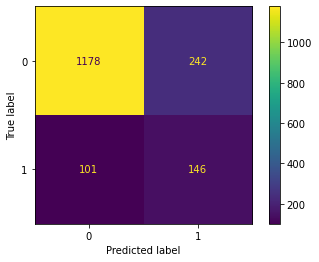

In [274]:
#Let's now see how our model has performed on predictions
cm = confusion_matrix(y1_test,y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

We see that the threshold has slightly reduced the predicted number of false positives which is what we needed.

### Balanced Random Forest Classifier

After doing a little research, i found out that Decision Tree classification model struggles with imbalanced data. And even after introducing class_weight = 'balanced', it does not improve significantly. 

Hence, i decided to try Balanced Random Forest that handles imbalanced data better as compared to Decision Trees since it contains many trees.

In [ ]:
#importing the balancedrandomforest library
from imblearn.ensemble import BalancedRandomForestClassifier

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, train_size=0.5,random_state=452)

In [276]:
#instantiating & fitting the model

rfc = BalancedRandomForestClassifier(random_state=254)

rfc.fit(X1_train, y1_train)


BalancedRandomForestClassifier(random_state=254)

In [277]:
# importing libraries that will evaluate the model using various metrics
from sklearn.metrics import accuracy_score,auc,roc_curve

#predictions of the dependent variable on the X_test data
y_preds = rfc.predict(X1_test)

In [ ]:
#getting the probabilities for the 2 models
accuracy_score(y1_test, y_preds)
rfc.predict_proba(X1_test)[:, 1]
# predictions in lr

lr_y_preds = LogR.predict(X1_test)

accuracy_score(y1_test, lr_y_preds)

# #probability for the linear regression model
lr_y_prob = LogR.predict_proba(X1_test)[:, 1]

# #proability for random forest
rfc_y_prob =  rfc.predict_proba(X1_test)[:, 1]

#roc curves
lr_fpr, lr_tpr, i = roc_curve(y1_test, lr_y_prob)

rfc_fpr, rfc_tpr, i = roc_curve(y1_test, rfc_y_prob)

lr_auc = auc(lr_fpr, lr_tpr)
rfc_auc = auc(rfc_fpr, rfc_tpr)

In [ ]:
# evaluating the balanced random forest model
print(classification_report(y1_test, y_preds))
print(confusion_matrix(y1_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      1420
           1       0.52      0.84      0.64       247

    accuracy                           0.86      1667
   macro avg       0.74      0.85      0.78      1667
weighted avg       0.90      0.86      0.87      1667

[[1229  191]
 [  40  207]]


In [ ]:
#Their accuracy scores
LRaccuracy = accuracy_score(y1_test,y_pred)
BRFCaccuracy = accuracy_score(y1_test,y_preds)



print(f'Accurancy score of the logistic model fitted:{LRaccuracy:.3f} ({LRaccuracy*100:.1f}%)')
print()
print(f'Accurancy score of the balanced random forest fitted:{BRFCaccuracy:.3f} ({BRFCaccuracy*100:.1f}%)')

Accurancy score of the logistic model fitted:0.794 (79.4%)

Accurancy score of the random forest fitted:0.861 (86.1%)


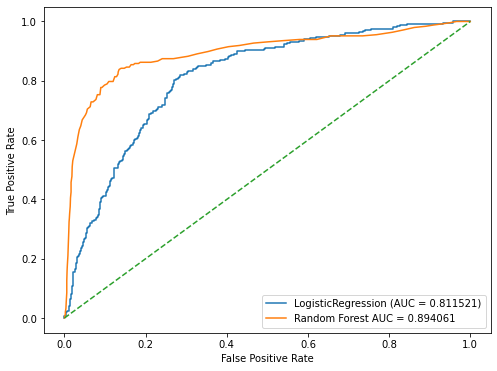

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:2f})')
plt.plot(rfc_fpr, rfc_tpr, label=f'Balanced Random Forest AUC = {rfc_auc:2f}')
plt.plot([0,1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Interpretation of the model - Random Forest

Compared to the logistic regression model, this one has performed quite better. As indicated by the ROC curve above,we can see that the AUC for the balanced random forest classifier is higher indicating that it has performed better in separating the tru and false class. Additionally, we see that it has a stronger recall meaning, it 83.8% of the time correctly predicts the actual true churns missing only roughly 16%.

In [284]:
# displaying the values for the metrics we've used in our data.

from sklearn.metrics import precision_score,recall_score,f1_score

print(f'Logistic Regression Model, Precision score is:', precision_score(y1_test, y_pred))
print(f'Logistic Regression Model, Recall score is:', recall_score(y1_test, y_pred))
print(f'Logistic Regression Model, F1 score for is:', f1_score(y1_test, y_pred))
print()
print(f'Random Forest Model,Precision score is:', precision_score(y1_test, y_preds))
print(f'Random Forest Model,Recall score is:', recall_score(y1_test, y_preds))
print(f'Random Forest Model,f1_score is:', f1_score(y1_test, y_preds))

Logistic Regression Model, Precision score is: 0.37628865979381443
Logistic Regression Model, Recall score is: 0.5910931174089069
Logistic Regression Model, F1 score for is: 0.45984251968503936

Random Forest Model,Precision score is: 0.5201005025125628
Random Forest Model,Recall score is: 0.8380566801619433
Random Forest Model,f1_score is: 0.6418604651162791


### Conclusion

#### ** Rationale
From the observed evaluation metrics used, we can see that by all comparison, the balanced random forest model performs better compared to the logistic regression.
I believe the Logistic model failed to perform well due to a lot of nonlinear features that went into model fitting. Additionally,by virute of being able to isolate the few true classes, BRFC (Balanced Random forest Classifier) perfomed better as it creates multiple trees, forcing each tree to see balanced classes.

#### ** Results Interpretation
We see from the recall values displayed that RF(Random Forest) is better at actually capturing the TP (actual positives) meaning it predicts fewer false positives. This was especially crucial for me as i overall was looking at how the results of this model could affect potential cut backs causing revenue to drop within Syria Tel.It can also be observed that when the LR (Logistic Regression) predicts the true churn rate, then it get's it accurate 38% of the time.This wasn't good enough.

#### ** Limitations 
The BRFC may overfit the data seeing as the dataset is not big. Meaning, that when put to the test in bulk unseen data, it may not perform so well without hyperparameter tuning.
Additionally, seeing as BRFC is an ensemble of decision trees, it may be harder to interpret to stakeholders why the model made specific predictions.

#### ** Recommendations

The data contains nonlinear structure and interactions that logistic regression cannot capture. Also, it showed evidence of a lot of multicollinearity which favoured BRFC model. However, when put to the test with real world big data, it may not performed as intended and may need the use of hyperparameters to tune it and cross-validation to ensure that the predictions are stable.

#### Data Preparation

#### Feature Selection
- Dropped phone number as it is a unique identifier with no predictive power.
- Dropped state and area code to simplify the initial model (can be revisited later).
- Dropped total day charge, total eve charge, total night charge, and total intl charge to prevent multicollinearity with the "minutes" features.

#### Encoding
- Mapped international plan and voice mail plan from "yes"/"no" to binary $1/0$.
- Converted the target churn to integer format ($1$ for True, $0$ for False).

#### Train-Test Split
- The data was split into 80% Training and 20% Testing sets.
- Used stratified sampling to ensure the churn distribution remained consistent across both sets.

#### Scaling
- Applied StandardScaler to the training features to normalize numerical values (essential for distance-based models like Logistic Regression).
- The transformation was then applied to the test set using the training parameters to prevent data leakage.